# TP: Machine Learning (SIA_3611)

## TP4: AutoML (4h) 

by Guillaume Renton 

In previous TP, you have learned to use machine learning for different kind of tasks, from regression to clustering through classification. In this TP, you are going to use the earned knowledge on new datasets for regression and classification. 

You are going to use 2 new datasets in this TP. First one is california housing, whose target variable is the value of houses in california, expressed in hundred of thousand of dollars. For each house, a set of 9 features is available. There is a total of 20 060 data. 

Second one is MNIST, a very popular dataset for handwritten recognition and image classification. The original dataset is made of 60 000 training images of shape 28x28 of handwritten digits from 0 to 9, and 10 000 images for test dataset. For computaional time, you will work on a given random subset of MNIST made of 6000 images in train and 1000 images in test.  

**Objectives :** 
- Apply your knowledge on new datasets
- Tune models hyperparameters and explore metrics 
- Apply principal components analysis and understand its effects on both dataset
- Understand and use Cross-Validation
- Use AutoML to find interesting models 

### STEP 1 : Getting started with new datasets

#### Substep 1 : Regression

In first part of step 1, you will work on the regression problem with the dataset california housing.

**To do 1.1**

Execute the following cell to load the california housing dataset and normalize it.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import normalize

X, y = fetch_california_housing(return_X_y = True)
X = normalize(X)

**To code 1.2**

Apply [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) and [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) methods and cross validate your results using 5 folders. For this, you can either use the function [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)(or any other method for cross validation in sklearn) or either compute yourself the cross validation. According to a relevant metric optimize both methods. For SGD you will optimize the value of alpha for both L2 and L1 penalty score. For SVR, you will optimize the kernel. Be careful with the metric if you use cross_val_score, the returned values are often negative.

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


sgd=SGDRegressor(alpha=.1,penalty='l1',learning_rate='optimal')
svr=SVR(kernel='poly',degree=3)


In [ ]:
from sklearn.metrics import make_scorer


L=cross_val_score(sgd,X,y,cv=5)
print('SGD score : ',L)
print('mean score : ',L.mean())

SGD score :  [-0.2180968  -0.02471116 -0.09185235 -0.07264127 -0.03990997]
mean score :  -0.08944231022136831


In [ ]:
print('SVR score : ',cross_val_score(svr,X,y,cv=5))

SVR score :  [ 0.13827998  0.088086   -0.06733284  0.14780674 -0.00324432]


**Question 1**

According to your metric, which method obtain the best result ? 

For SVR with polynomial kernel

**Question 2**

What is the interest of using cross validation in general ? Is it relevant in this particular case ?

It is possible to see if the model is good without real validation or test set. as you have more than 20k data sample we can maybe split it in train et test data set

**To code 1.3**

Transform your data according to [principal component analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), and optimize the number of components according to the same metric than previously for both models.

In [4]:
from sklearn.decomposition import PCA

In [ ]:

L_mean_score=[]
for i in range(1,8+1):
    pca=PCA(n_components=i)
    X_pca=pca.fit_transform(X,y)
    L=cross_val_score(sgd,X_pca,y,cv=5)
    L_mean_score.append(L.mean())
    print('mean score ',i,'components : ' ,L.mean())

ind=L_mean_score.index(max(L_mean_score))+1
print('Best n_components = ',ind)
pca=PCA(n_components=ind)
X_pca=pca.fit_transform(X,y)
print('SGD score with ',ind,' component(s) :',cross_val_score(sgd,X_pca,y,cv=5))
print('SVR score with ',ind,' component(s) :',cross_val_score(svr,X_pca,y,cv=5))

mean score  1 components :  -0.08980081887714597
mean score  2 components :  -0.08817797915817263
mean score  3 components :  -0.08864667124354404
mean score  4 components :  -0.08914135888939759
mean score  5 components :  -0.08906477246234426
mean score  6 components :  -0.08866781759104118
mean score  7 components :  -0.08962526411216606
mean score  8 components :  -0.08902728683654182
Best n_components =  2
SGD score with  2  component(s) : [-0.21359857 -0.02468828 -0.09339172 -0.07136492 -0.04035543]
SVR score with  2  component(s) : [-0.02877117 -0.16081697 -0.28342163 -0.00273581 -0.18936861]


**Question 3**

What is the interest of Principal Component Analysis in general ? Is it relevant here ?

Reduce dimensionality to generalize more the model. It's not really relevant here since we don't have a lot of features already 

#### Substep 2 : Classification

**To do 1.4**

Execute the following cells to load a subset of MNIST dataset. Since the dataset is already divided into training/test, we won't use cross validation this time.

In [5]:
import pickle
with open("data/mnist.pkl", "rb") as f:
    ((X_train, y_train), (X_test, y_test)) = pickle.load(f)

**To code 1.5**

Compute classification on those images using a [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) and an [Adaboost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). For each classifier, optimize the parameters according to a relevant metric. For the KNN classifier, you will optimize the number of neighbor while for the Adaboost classifier, you will optimize the base estimator along with the number of estimators (for the basis estimator, limit yourself to different depth of decision tree classifier). 

Also, for each model, compute the confusion matrix.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
L_accuracy=[]
for i in range(1,25):
    adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=i))
    adaboost.fit(X_train,y_train)
    y_predict_ada=adaboost.predict(X_test)
    acc=accuracy_score(y_test,y_predict_ada)
    L_accuracy.append(acc)
    print(i,acc)
best_depth=L_accuracy.index(max(L_accuracy))+1
print('max_depth that optimize accuracy is ',best_depth,' with a score of ',L_accuracy[best_depth-1])

1 0.524
2 0.555
3 0.677
4 0.729
5 0.762
6 0.808
7 0.846
8 0.88
9 0.895
10 0.897
11 0.913
12 0.91
13 0.911
14 0.91
15 0.915
16 0.917
17 0.909
18 0.916
19 0.886
20 0.838
21 0.761
22 0.767
23 0.748
24 0.748
max_depth that optimize accuracy is  16  with a score of  0.917


In [ ]:
L_accuracy=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predict_knn=knn.predict(X_test)
    acc=accuracy_score(y_test,y_predict_knn)
    L_accuracy.append(acc)
    print(i,acc)
best_n_neighbors=L_accuracy.index(max(L_accuracy))+1
print('n_neighboor that optimize accuracy is ',best_n_neighbors,' with a score of ',L_accuracy[best_n_neighbors-1])

1 0.904
2 0.9
3 0.913
4 0.913
5 0.916
6 0.913
7 0.914
8 0.913
9 0.909
10 0.906
11 0.902
12 0.901
13 0.898
14 0.895
15 0.896
16 0.895
17 0.895
18 0.898
19 0.892
20 0.889
21 0.887
22 0.886
23 0.884
24 0.883
25 0.881
26 0.879
27 0.878
28 0.877
29 0.877
n_neighboor that optimize accuracy is  5  with a score of  0.916


**Question 4**

According to your metric, which method obtain the best results ? 

the best method for me is AdaBoost with max_depth of 17

In [ ]:
best_depth=16
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_depth))
adaboost.fit(X_train,y_train)
y_predict=adaboost.predict(X_test)

**Question 5**

According to the confusion matrix, which class is the easiest to classify ? Which ones are the most difficult ? Which ones are the most confused with each other ?

<Figure size 432x288 with 0 Axes>

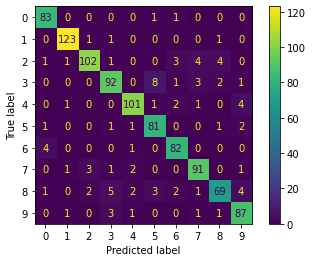

[0.9764705882352941, 0.9761904761904762, 0.8793103448275862, 0.8598130841121495, 0.9181818181818182, 0.9310344827586207, 0.9425287356321839, 0.9191919191919192, 0.7752808988764045, 0.925531914893617]
Easiest to classify : 0
Hardest to classify : 8
The most confused seems to be 3 since it is sometimes predicted wrong


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

plt.figure()
ConfusionMatrixDisplay.from_estimator(adaboost,X_test,y_test)
confusion_matrix=confusion_matrix(y_test,y_predict)
plt.show()
L = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(y_test)):
    L[y_test[i]]+=1
acc_per_label=[]
for i in range(10):
    acc=confusion_matrix[i,i]/L[i]
    acc_per_label.append(acc)
print(acc_per_label)
print('Easiest to classify :',acc_per_label.index(max(acc_per_label)))
print('Hardest to classify :',acc_per_label.index(min(acc_per_label)))
print('The most confused seems to be 3 since it is sometimes predicted wrong')


**Bonus** 

For the Adaboost classifier, explore other classifier as base estimators. What are the limitations about those estimators ?

In [17]:
import pickle
with open("data/mnist.pkl", "rb") as f:
    ((X_train, y_train), (X_test, y_test)) = pickle.load(f)
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier



adaboost=AdaBoostClassifier(GaussianNB())
adaboost.fit(X_train,y_train)
y_predict=adaboost.predict(X_test)
acc=accuracy_score(y_predict,y_test)
print('Naive bayes accuracy : ',acc)

adaboost=AdaBoostClassifier(RandomForestClassifier())
adaboost.fit(X_train,y_train)
y_predict=adaboost.predict(X_test)
acc=accuracy_score(y_predict,y_test)
print('Random forest accuracy : ',acc)

adaboost=AdaBoostClassifier(ExtraTreeClassifier())
adaboost.fit(X_train,y_train)
y_predict=adaboost.predict(X_test)
acc=accuracy_score(y_predict,y_test)
print('Extra tree classifier accuracy : ',acc)



Naive bayes accuracy :  0.608
Random forest accuracy :  0.932
Extra tree classifier accuracy :  0.65


**To code 1.6**

Transform your data according to principal component analysis, and optimize the number of components according to the same metric than previously for each classifier.

Once again, compute the confusion matrix for each model. 

In [ ]:

L_accuracy=[]
for i in range(1,701,50):

    pca=PCA(n_components=i)
    pca.fit(X_train,y_train)
    X_pca_train=pca.transform(X_train)
    X_pca_test=pca.transform(X_test)

    knn=KNeighborsClassifier(n_neighbors=best_n_neighbors)
    knn.fit(X_pca_train,y_train)
    
    y_predict_knn=knn.predict(X_pca_test)
    acc=accuracy_score(y_test,y_predict_knn)
    L_accuracy.append(acc)
    print(i,acc)
best_pca=L_accuracy.index(max(L_accuracy))*100+1
print('pca components that optimize accuracy is ',best_pca,' with a score of ',L_accuracy[best_pca-1])

1 0.249
51 0.934
101 0.928
151 0.921
201 0.922
251 0.92
301 0.915
351 0.916
401 0.917


In [ ]:
L=[10,100,300,600,700]
print(L)

for i in L:
    pca=PCA(n_components=i)
    pca.fit(X_train,y_train)
    X_pca_train=pca.transform(X_train)
    X_pca_test=pca.transform(X_test)

    knn=KNeighborsClassifier(n_neighbors=best_n_neighbors)
    knn.fit(X_pca_train,y_train)
        
    y_predict_knn=knn.predict(X_pca_test)
    acc=accuracy_score(y_test,y_predict_knn)
    print(i,acc)

[10, 100, 300, 600, 700]
10 0.876
100 0.926
300 0.915
600 0.916
700 0.916


**Question 6**

Is the use of PCA relevant here ? 

for n_components=100 We have 1% more so it's not bad 

**Question 7**

Did your answers from question 5 changed with PCA ?

<Figure size 432x288 with 0 Axes>

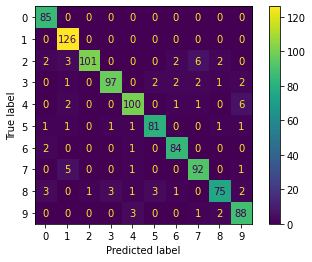

[1.0, 1.0, 0.8706896551724138, 0.9065420560747663, 0.9090909090909091, 0.9310344827586207, 0.9655172413793104, 0.9292929292929293, 0.8426966292134831, 0.9361702127659575]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

pca=PCA(n_components=100)
pca.fit(X_train,y_train)
X_pca_train=pca.transform(X_train)
X_pca_test=pca.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_pca_train,y_train)
        
y_predict_knn=knn.predict(X_pca_test)
acc=accuracy_score(y_test,y_predict_knn)

plt.figure()
ConfusionMatrixDisplay.from_estimator(knn,X_pca_test,y_test)
confusion_matrix=confusion_matrix(y_test,y_predict_knn)
plt.show()
L = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(y_test)):
    L[y_test[i]]+=1
acc_per_label=[]
for i in range(10):
    acc=confusion_matrix[i,i]/L[i]
    acc_per_label.append(acc)
print(acc_per_label)

The confusion matrix looks a little better but some predictions are stil confused

### Step 2 : AutoML

In this second section, we discuss on the utilisation of AutoMl tools, such as auto-sklearn.
If you are using colab or don't have auto-sklearn installed, you may need to run the following cell at first in order to install auto-sklearn. This will require you to restart the runtime (a prompt will invite you to). 

Restarting the runtime will clear all your variables and imported libraries, so you will need to import them again.

In [1]:
%pip install --force-reinstall scipy==1.6
%pip install --force-reinstall auto-sklearn==0.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.4 MB 1.2 MB/s 
     |████████████████████████████████| 15.7 MB 52.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 8.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.4 MB 45.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 4.3 MB 47.7 MB/s 
     |████████████████████████████████| 1.1 MB 37.6 MB/s 
     |████████████████████████████████| 260 kB 57.4 MB/s 
     |████████████████████████████████| 11.3 MB 43.6 MB/s 
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached setuptools-65.6.0-py3-none-any.whl (1.2 MB)
     |████████████████████████████████| 596 kB 61.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 297 kB 59.0 MB/s 
     |████████████████████████████████| 

**To do 2.1**

Execute the following cells.  

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
X, y = fetch_california_housing(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import os, shutil
from sklearn.metrics import mean_squared_error, mean_absolute_error

automl = autosklearn.regression.AutoSklearnRegressor(
    include = {'regressor': ["libsvm_svr", "sgd"]},
    time_left_for_this_task=360,
    per_run_time_limit=90,
    #tmp_folder='/tmp/california_housing_tmp',
)
automl.fit(X_train, y_train, dataset_name='California_Housing')

print(automl.leaderboard())

y_pred = automl.predict(X_test, y_test)
print("MSE = ", mean_squared_error(y_test, y_pred))
print("MRE = ", mean_absolute_error(y_test, y_pred))

[WARNING] [2022-11-19 11:49:10,459:Client-AutoMLSMBO(1)::California_Housing] Configuration 39 not found
[WARNING] [2022-11-19 11:49:10,459:Client-AutoMLSMBO(1)::California_Housing] Configuration 201 not found
[WARNING] [2022-11-19 11:49:10,460:Client-AutoMLSMBO(1)::California_Housing] Configuration 207 not found
[WARNING] [2022-11-19 11:49:10,460:Client-AutoMLSMBO(1)::California_Housing] Configuration 107 not found
[WARNING] [2022-11-19 11:49:10,460:Client-AutoMLSMBO(1)::California_Housing] Configuration 31 not found
[WARNING] [2022-11-19 11:49:10,460:Client-AutoMLSMBO(1)::California_Housing] Configuration 102 not found
[WARNING] [2022-11-19 11:49:10,460:Client-AutoMLSMBO(1)::California_Housing] Configuration 279 not found
[WARNING] [2022-11-19 11:49:10,460:Client-AutoMLSMBO(1)::California_Housing] Configuration 89 not found
[WARNING] [2022-11-19 11:49:10,460:Client-AutoMLSMBO(1)::California_Housing] Configuration 156 not found
[WARNING] [2022-11-19 11:49:10,460:Client-AutoMLSMBO(1)::C

In [17]:
from pprint import pprint
pprint(automl.show_models(), indent=4)

{   2: {   'cost': 0.2767239824457497,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fc84df78e10>,
           'ensemble_weight': 0.96,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fc84e043e90>,
           'model_id': 2,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fc84e043f10>,
           'sklearn_regressor': SVR(cache_size=1812.7291666666667, gamma=0.1, verbose=0)},
    10: {   'cost': 0.46657857467568276,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fc84df25150>,
            'ensemble_weight': 0.04,
            'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fc84e347510>,
            'model_id': 10,
            '

**Question 8**

What are the evaluated models by autoML ? 
Which model obtain the best performance ? 
What are the parameters of the best model ?

the models evaluated are SVR and SGD. The best model is SVR with parameters : cache_size=1928.6380208333333, gamma=0.1, verbose=0

**To code 2.2**

With the help of the previous code, use autoML for the classification task on MNIST, by limiting the exploration to KNN and Adaboost.

In [18]:
import autosklearn.regression
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import os, shutil
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score


import pickle
with open("data/mnist.pkl", "rb") as f:
    ((X_train, y_train), (X_test, y_test)) = pickle.load(f)



In [19]:
autoclass= autosklearn.classification.AutoSklearnClassifier(
    include={'classifier':["k_nearest_neighbors","adaboost"]},
    time_left_for_this_task=360,
    per_run_time_limit=90
)
autoclass.fit(X_train, y_train)

print(autoclass.leaderboard())

y_pred = autoclass.predict(X_test, y_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))


[WARNING] [2022-11-19 11:55:11,474:Client-AutoMLSMBO(1)::03c7523a-6801-11ed-80e0-0242ac1c0002] Configuration 445 not found
[WARNING] [2022-11-19 11:55:11,474:Client-AutoMLSMBO(1)::03c7523a-6801-11ed-80e0-0242ac1c0002] Configuration 571 not found
[WARNING] [2022-11-19 11:55:11,474:Client-AutoMLSMBO(1)::03c7523a-6801-11ed-80e0-0242ac1c0002] Configuration 617 not found
[WARNING] [2022-11-19 11:55:11,474:Client-AutoMLSMBO(1)::03c7523a-6801-11ed-80e0-0242ac1c0002] Configuration 112 not found
[WARNING] [2022-11-19 11:55:11,474:Client-AutoMLSMBO(1)::03c7523a-6801-11ed-80e0-0242ac1c0002] Configuration 121 not found
[WARNING] [2022-11-19 11:55:11,474:Client-AutoMLSMBO(1)::03c7523a-6801-11ed-80e0-0242ac1c0002] Configuration 707 not found
[WARNING] [2022-11-19 11:55:11,474:Client-AutoMLSMBO(1)::03c7523a-6801-11ed-80e0-0242ac1c0002] Configuration 124 not found
[WARNING] [2022-11-19 11:55:11,474:Client-AutoMLSMBO(1)::03c7523a-6801-11ed-80e0-0242ac1c0002] Configuration 237 not found
[WARNING] [2022-

In [3]:
from pprint import pprint
pprint(autoclass.show_models(), indent=4)

NameError: ignored

**Question 9**

What are the evaluated models by autoML ? 
Which model obtain the best performance ? 
What are the parameters of the best model ?

the models evaluated are KNN and AdaBoost. The best model is KNN with parameters : n_neighbors=4, weights='distance'

### Bonus step 

As a bonus step, have fun and remove a maximum of constraints of your autoML model. Which model obtain the best performances ? Describe the parameters of this model. You can do it for either for regression or classification or both.

In [19]:
with open("data/mnist.pkl", "rb") as f:
    ((X_train, y_train), (X_test, y_test)) = pickle.load(f)

autoclass= autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=3600,
    per_run_time_limit=360
)
autoclass.fit(X_train, y_train)

print(autoclass.leaderboard())

y_pred = autoclass.predict(X_test, y_test)
acc= accuracy_score(y_test, y_pred)
print("Accuracy = ",acc)


          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
47           1             0.04           libsvm_svc  0.028788   8.753765
5            2             0.04  k_nearest_neighbors  0.038889   3.425552
77           3             0.02           libsvm_svc  0.040404   4.831798
23           4             0.02           libsvm_svc  0.044949   4.682353
58           5             0.02           libsvm_svc  0.052525   5.597967
30           6             0.02           libsvm_svc  0.056061   9.617150
28           7             0.02           libsvm_svc  0.063131   3.198135
34           8             0.42             adaboost  0.078788  57.808697
82           9             0.02        random_forest  0.090404   8.479548
75          10             0.04                  lda  0.101515  43.314339
53          11             0.34             adaboost  0.102525  67.580489
Accuracy =  0.955


NameError: ignored

In [22]:
from pprint import pprint
pprint(autoclass.show_models(), indent=4)


{   5: {   'balancing': Balancing(random_state=1, strategy='weighting'),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f4bf6e42090>,
           'cost': 0.03888888888888886,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f4bf6f2c850>,
           'ensemble_weight': 0.04,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f4bf6e421d0>,
           'model_id': 5,
           'rank': 1,
           'sklearn_classifier': KNeighborsClassifier(n_neighbors=4, weights='distance')},
    23: {   'balancing': Balancing(random_state=1),
            'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f4bf6f36250>,
            'cost': 0.04494949494949496,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice

The best is SVC with parameters : C=1180.1813298257937, cache_size=1840.7447916666667, class_weight='balanced', coef0=-0.03304972735529399, degree=4, gamma=5.889819560229595, kernel='poly', max_iter=-1.0, random_state=1, tol=5.294571125698735e-05)

We can see that parameters are really presice because we let him the time to choose them better